# Stock Library Examples

### Minimal example

<Axes: >

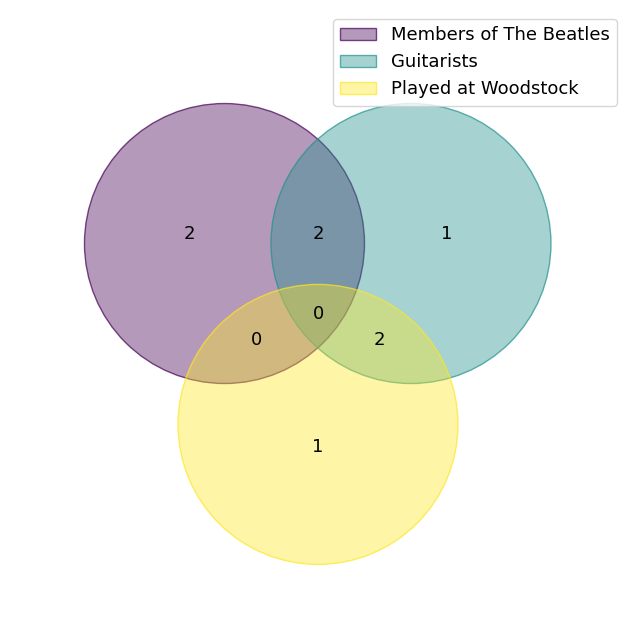

In [8]:
from copy import deepcopy
from venn import venn
%matplotlib inline

musicians = {
    "Members of The Beatles": {"Paul McCartney", "John Lennon", "George Harrison", "Ringo Starr"},
    "Guitarists": {"John Lennon", "George Harrison", "Jimi Hendrix", "Eric Clapton", "Carlos Santana"},
    "Played at Woodstock": {"Jimi Hendrix", "Carlos Santana", "Keith Moon"}
}
venn(musicians)

### Examples of Venn diagrams for various numbers of sets
True Venn diagrams can be plotted for 2, 3, 4, or 5 sets using ellipses, and for 6 sets using triangles.

The `venn()` function accepts optional arguments `cmap`, `fmt`, `alpha`, `fontsize`, `legend_loc`, `figsize`, and `ax`.  
`cmap` can be either a name of a matplotlib colormap or a list of color names.  
`fmt` is a Python 3 style format string that understands `{size}`, `{percentage}`, and `{logic}`.  
`legend_loc` defaults to "upper right"; to disable the legend altogether, pass `legend_loc=None`.  
`figsize` only has effect when `ax=None`; otherwise the diagram is plotted onto an existing axes and `figsize` is ignored.

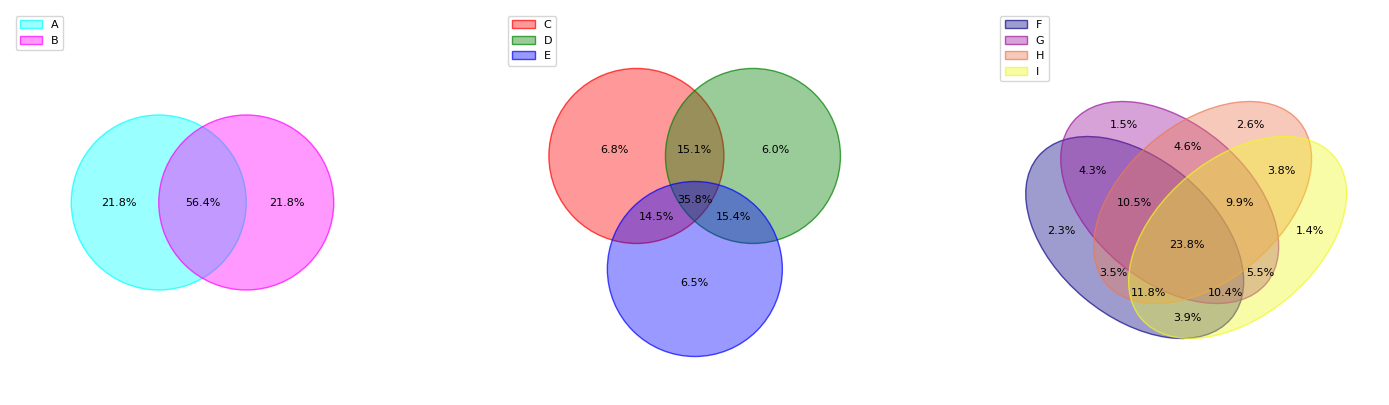

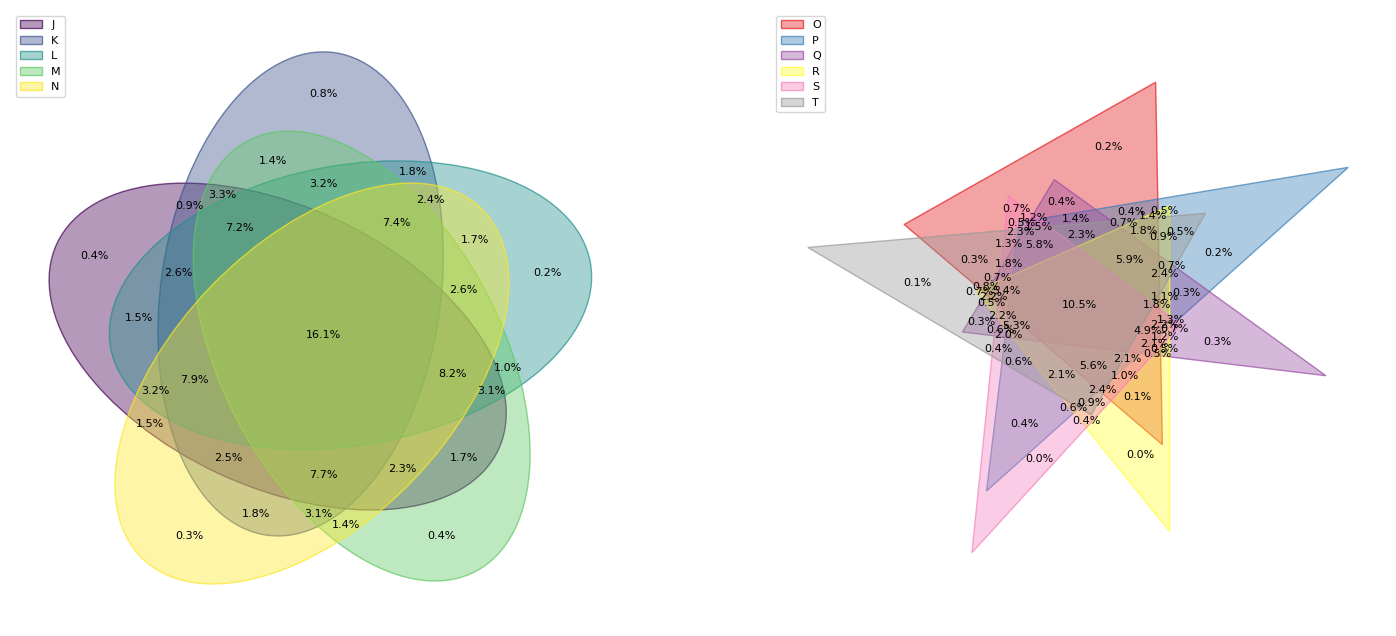

In [9]:
from matplotlib.pyplot import subplots
from itertools import chain, islice
from string import ascii_uppercase
from numpy.random import choice

_, top_axs = subplots(ncols=3, nrows=1, figsize=(18, 5))
_, bot_axs = subplots(ncols=2, nrows=1, figsize=(18, 8))
cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
letters = iter(ascii_uppercase)

for n_sets, cmap, ax in zip(range(2, 7), cmaps, chain(top_axs, bot_axs)):
    dataset_dict = {
        name: set(choice(1000, 700, replace=False)) for name in islice(letters, n_sets)
    }
    venn(dataset_dict, fmt="{percentage:.1f}%", cmap=cmap, fontsize=8, legend_loc="upper left", ax=ax)

### Pseudo-Venn diagrams:
Six-set true Venn diagrams are somewhat unwieldy, and not all intersections are usually of interest.  
To address this, the `pseudovenn()` function has been implemented which plots the sets as circles.

The function accepts the same arguments as `venn()`.  
Additionally, you can pass `hint_hidden=False` if you wish not to display information about elements in hidden intersections.  

Some intersections are not present, but the most commonly wanted are. You might want to order the input dictionary to ensure the instersections of interest show up on the diagram.  
In Python 3.7+, `dict`s are ordered by implementation; prior to Python 3.7, `collections.OrderedDict` can be used instead.

<Axes: >

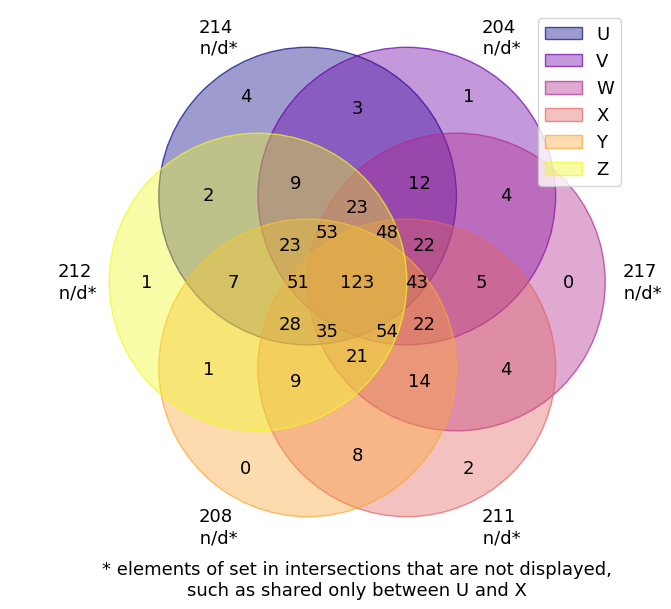

In [10]:
from venn import pseudovenn

dataset_dict = {
    name: set(choice(1000, 700, replace=False))
    for name in islice(letters, 6)
}
pseudovenn(dataset_dict, cmap="plasma")

### Manual adjustment of petal labels
If necessary, the labels on the petals (i.e., various intersections in the Venn diagram) can be adjusted manually.  
For this, `generate_petal_labels()` can be called first to get the `petal_labels` dictionary, which can be modified.  
After modification, pass `petal_labels` to functions `draw_venn()` or `draw_pseudovenn6()`.

NB: you will need to specify all parameters to the `draw_*` functions  
(the defaults are only defined for higher-level functions `venn()` and `pseudovenn()`).

In [11]:
from venn import generate_petal_labels, draw_venn, generate_colors

dataset_dict = {
    # name: set(choice(1000, 250, replace=False)) for name in list("αβγ")
    name: set(choice(1000, 1, replace=False)) for name in list("αβγ")
}

petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{size}")
petal_labels

{'001': '1',
 '010': '1',
 '011': '0',
 '100': '1',
 '101': '0',
 '110': '0',
 '111': '0'}

In [12]:
dataset_dict

{'α': {773}, 'β': {277}, 'γ': {768}}

In [13]:
significance_filter = lambda value: value if int(value) >= 45 else "ns"
petal_labels = {
    logic: significance_filter(value)
    for logic, value in petal_labels.items()
}
for logic in "001", "010", "100":
    del petal_labels[logic]
petal_labels

{'011': 'ns', '101': 'ns', '110': 'ns', '111': 'ns'}

In [15]:
petal_labels = {} ## empty labels

<Axes: >

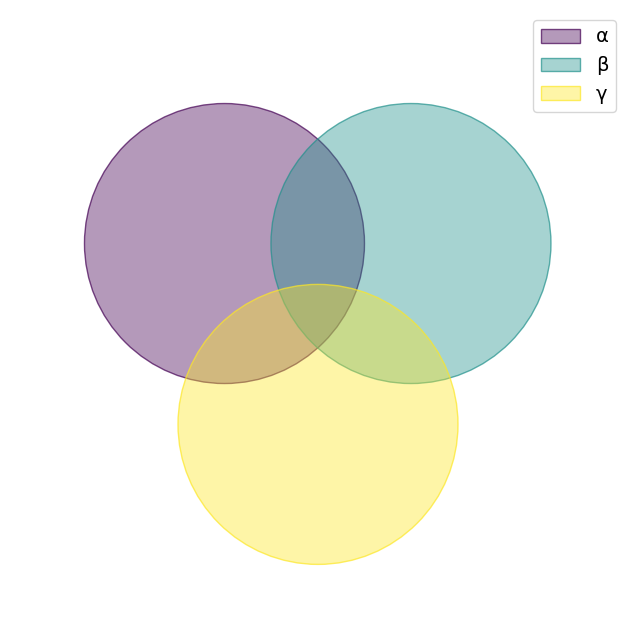

In [16]:
draw_venn(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=3),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)

# Custom Examples

## Pho's 2025-05-09 Exploration for Plot Legends

In [3]:
# all_decoder_colors_dict = {'long': '#4169E1', 'short': '#DC143C', 'long_LR': '#4169E1', 'long_RL': '#607B00', 'short_LR': '#DC143C', 'short_RL': '#990099'} ## Just hardcoded version of `additional_cmap_names`
all_decoder_colors_dict = {'long_LR': '#4169E1', 'long_RL': '#607B00', 'short_LR': '#DC143C', 'short_RL': '#990099'} ## Just hardcoded version of `additional_cmap_names`


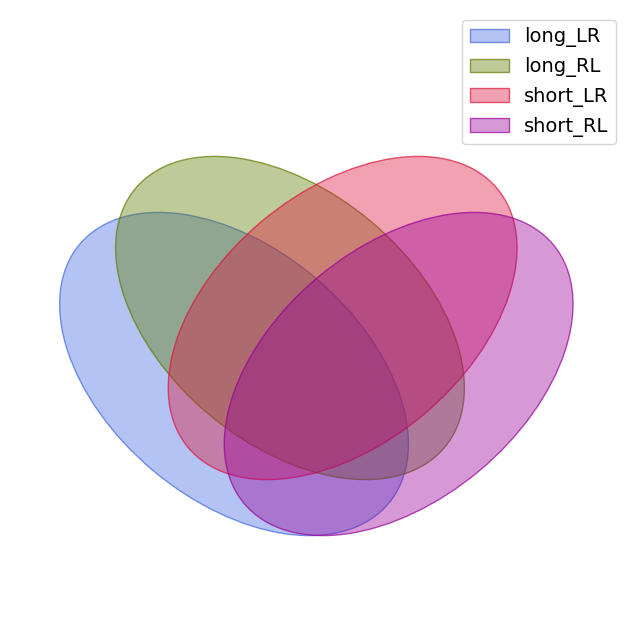

In [ ]:


def _build_decoder_legend_venn(all_decoder_colors_dict: Dict[str, str], ax=None):
    """ builds a simple venn-diagram showing the colors for each decoder, allowing the user to see what they look like overlapping
    """
    from matplotlib.pyplot import subplots
    from venn import draw_venn, generate_colors

    n_sets: int = len(all_decoder_colors_dict)
    cmap = list(all_decoder_colors_dict.values())
    if ax is None:
        ## make new figure if needed
        fig, ax = subplots(figsize=(18, 8))
        
    dataset_dict = {k:{100} for k, v in deepcopy(all_decoder_colors_dict).items()}

    # _out = venn(dataset_dict, fmt="{percentage:.1f}%", cmap=cmap, fontsize=8, legend_loc="upper left", ax=ax)
    petal_labels = {} ## empty labels
    _out = draw_venn(
        petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
        hint_hidden=False,
        colors=generate_colors(cmap=cmap, n_colors=n_sets),
        # colors=cmap,
        figsize=(8, 8), fontsize=14, legend_loc="best", ax=ax
    )
    return ax, _out

all_decoder_colors_dict = {'long_LR': '#4169E1', 'long_RL': '#607B00', 'short_LR': '#DC143C', 'short_RL': '#990099'} ## Just hardcoded version of `additional_cmap_names`
ax, _out =  _build_decoder_legend_venn(all_decoder_colors_dict=all_decoder_colors_dict, ax=None)


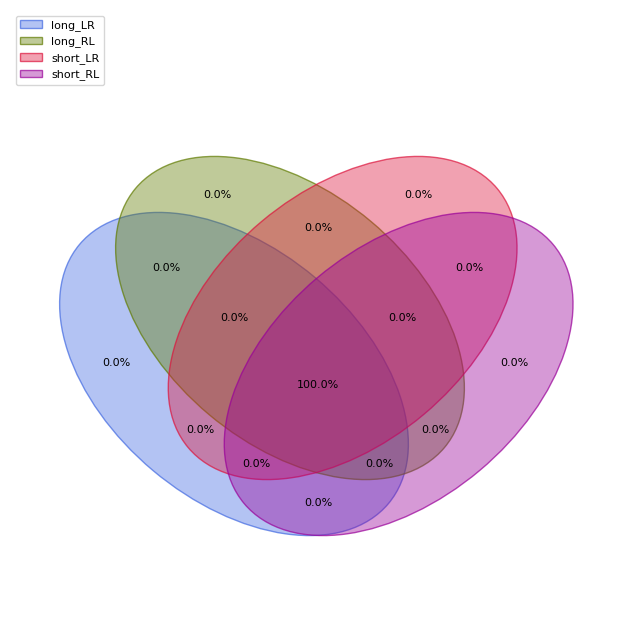

In [ ]:
from matplotlib.pyplot import subplots
# from itertools import chain, islice
# from string import ascii_uppercase
# from numpy.random import choice
from venn import generate_petal_labels, draw_venn, generate_colors


# _, top_axs = subplots(ncols=3, nrows=1, figsize=(18, 5))
# _, bot_axs = subplots(ncols=2, nrows=1, figsize=(18, 8))
# cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]

# letters = iter(ascii_uppercase)

n_sets = len(all_decoder_colors_dict)
cmap = list(all_decoder_colors_dict.values())
fig, ax = subplots(figsize=(18, 8))
dataset_dict = {k:{60} for k, v in deepcopy(all_decoder_colors_dict).items()}

_out = venn(dataset_dict, fmt="{percentage:.1f}%", cmap=cmap, fontsize=8, legend_loc="upper left", ax=ax)

In [6]:
_out

<Axes: >